# Causal relationship between Founding Date and Valuation of start-ups

## ABSTRACT

When evaluating startup opportunities there are numerous theories that aim to **predict the success *(valuation)* of the company in the future.** Investors and countries are variables that are commonly considered, however, given that our economy is cyclical, and companies were under different conditions when starting, one can expect a relationship between the founding date and the average valuation.

The aim of the study is to analyse wehether starting with on the ***right*** year has an **impact on future valuation.**


Expressing **causality mathematically**, we can frame the research question as:

`E[Valuation ($B) | Join Date] = f(Join Date)`
* X = Date Joined
* Y = Valuation ($B)

Here we use a dataset of all companies from 2011 until 2021 and we apply **Ordinary Least Squares (OLS) Regression** to understand how much of the variance of Y is explained by X.

The results show that indeed the **foudning year explains most of the variance of the valuation of a company**. For the years 2016-2021, we observe a negative relationship with a  R-squared value of -0.8258.
This time period is part of a cycle and while one cannot infer the exact duration of a cycle, we can expect the valuation to have a positive relationship with the founding date again in the next cycle.

Hence, the main insight from this study is that the starting year does explain the future success of a company, however, the relationship is either positive or negative depending on the cycle we are in.


#### **Confounders:**

Confounders are factors that have the potential to influence both the founding date of a startup (X) and its valuation (Y), making it **challenging to establish a direct causal relationship between these two variables.**

To mitigate the influence of confounders, we will control for certain variables:

*   **Country**: this variable is correlated to both the starting year and the valuation.
  * *Country* -> *Valuation:* In some countries there are higher valuations than in others given that the VC industry is more mature.
  * *Country* -> *Date Joined*: investments are also highly dependent on policies of given countries therefore focusing on only one country might create a biased correlation.
*   **City**: this variable is also correlated with both our dependent and independent variables and is a confounder for very similar reasons to which the country is a confounder.
*   **Industry**:
  * *Valuation:* Different industries may exhibit varying levels of investor interest and potential for high valuations
  * *Date Joined*:Industry dynamics and trends can influence the timing of startup launches.


 By incorporating these control variables into our analysis, we aim to account for regional variations and the influence of geographic location and industry on startup valuations. This allows us to isolate and examine the specific impact of a startup's founding date on its valuation, controlling for the potential confounding effects of these variables.


**Confounders - not controlled:**

In our analysis, certain confounding variables, particularly qualitative ones that are not included in our dataset, will remain uncontrolled due to various limitations and complexities. These uncontrolled confounders can include:

* **Industry-Specific Conditions:** Different industries may have unique factors that influence valuations, which are challenging to account for comprehensively.

* **Founder Experience:**The expertise and background of startup founders can significantly impact a company's success and the year of investment (*risk adversion is dependent on risk and founders with less experience are increasing risk significantly*) but are not explicitly considered in our analysis.

* **Competitive Landscape**: The level of competition in a given market can affect valuations and the timing of market entry.

* **Regulatory Changes**: Global legal and regulatory shifts can have unforeseen effects on startup valuations and founding dates.

* **Technological Advancements**: Rapid advancements in technology can disrupt industries and influence startup dynamics.

* **Economic Events:** Broader economic factors and events can impact the availability of funding and startup success.

While these factors may indeed influence startup valuations, addressing them comprehensively within a single analysis may be challenging or require additional data and expertise. As such, we acknowledge that our analysis will provide insights into the relationship between founding date and valuation while recognizing the potential presence of uncontrolled qualitative confounding variables.


#### **Colliders:**



In the evaluation of startup success, particularly regarding factors affecting valuation, it is crucial to consider various variables that may influence the outcome. However, in this intricate web of causal relationships, certain variables can act as colliders, complicating our understanding of the true causal effects. Colliders are variables through which multiple causal paths intersect, and they **can introduce unintended biases into our analysis.**


------------


In this context, we examine two potential colliders and their impact on the experiment: "Investor" and "Amount of dry powder available."


* **Investor:**

  * `Founding year -> Investor:` The founding year of a startup might influence the type of investor it attracts. Different years may see varying investor preferences, strategies, or risk appetites. For instance, investors might have favored technology startups in one period and healthcare startups in another.
  *  `Valuation -> Investor:` Conversely, the valuation of a startup can also affect the choice of investors. High valuation might attract more prominent investors or venture capital firms, while lower valuation might result in a different set of investors or funding sources.

* **Amount of dry powder available:**

  * `Valuation -> Dry powder:` Lower valuations cause the amount of dry powder to increase. When startups have lower valuations, it can potentially make them more appealing to investors, leading to increased available capital ("dry powder") for investment. Investors may allocate more funds to startups with attractive valuations, creating a positive correlation.

  * `Investment year -> Dry powder:` The overall economic and investment climate in a given year can influence the amount of dry powder available to investors. In recessionary periods, investors might hold onto more cash reserves, while in prosperous times, they may be more willing to deploy capital. This temporal aspect can affect the dry powder.


.

------------


**Impact on the Experiment:**

Understanding the impact of colliders on the experiment is crucial. In this context, these colliders can **significantly affect the observed relationships**between founding year, valuation, and investor type. For instance, a correlation between founding year and valuation may be influenced by the type of investor attracted during specific periods.

However, it is **challenging to completely control** for these colliders because they represent intricate, multifaceted relationships influenced by various external factors. Attempting to control for these colliders through traditional statistical methods could lead to oversimplified or misleading conclusions. Moreover, the specific motivations and decision-making processes of investors are complex and can't be entirely captured by observed variables.

In summary,**recognizing and accounting for colliders** is essential when analyzing the causal relationships within startup success. While these colliders indeed impact the experiment, their intricate nature and the myriad of unobservable factors make it challenging to control for them fully. Advanced causal inference techniques and structural modeling may be necessary to disentangle these complex relationships and draw more accurate conclusions about the factors influencing startup valuation.

#### **Data Cleaning and Preprocessing**

In this analysis, **we begin by importing necessary libraries**such as Pandas, Seaborn, and Matplotlib, as well as loading a dataset containing information about startups in 2021.

**The first step** involves data cleaning, where we **rename** columns for clarity, **convert** the 'Join Date' and 'Valuation' columns to their correct formats, and handle missing values.

Specifically, we **drop** rows with missing data and filter the dataset to include only entries from the year 2016 onwards, as this timeframe is of particular interest for our study.

**The cleaned dataset** is then ready for further exploration and analysis.

In [12]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import files
from google.colab import files

The dataset contains the following **columns**:

* `Company`: The name of the startup company.
* `Valuation ($B)`:  The valuation of the company in billions of dollars.
* `Date Joined` :The date when the company joined.
* `Country` : The country where the company is based.
* `City` : The city where the company is located

In total there are 936 entries, where each row is a different company


In [13]:
# Load the dataset
df_startups = pd.read_csv('Startups in 2021 end 2.csv')

# Display the first few rows to inspect the data
df_startups.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [14]:
# DATA CLEANING

# Step 1: Rename Columns
df_startups = df_startups.rename(columns={
    'Valuation ($B)': 'Valuation',
    'Date Joined': 'Join Date',
    'Select Investors': 'Investors'
})

# Step 2: Convert to Correct Format
df_startups['Join Date'] = pd.to_datetime(df_startups['Join Date'], format='%m/%d/%Y')
df_startups['Valuation'] = df_startups['Valuation'].str.replace('$', '').str.replace(',', '').astype(float)

# Step 3: Check and Handle Missing Values
missing_values = df_startups.isnull().sum()
df_startups.dropna(inplace=True)

# Step 4: Given that there are very few values filter for after 2014
df_startups['Join Date'] = df_startups['Join Date'].dt.year
df_startups = df_startups[df_startups['Join Date'] > 2015]

<ipython-input-14-09a99f22f145>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_startups['Valuation'] = df_startups['Valuation'].str.replace('$', '').str.replace(',', '').astype(float)


#### **Exploratory data analysis (EDA)**

In this section of the analysis, we delve into the distribution of startup valuations and explore the top countries, cities, and industries with the most startups and their corresponding mean valuations.


* **To begin, we examine the distribution of valuations,** revealing a power-law curve that signifies a skewed distribution with a few high-valued outliers. This is a common factor that happens in the VC industry, where the very few succeed take home most of the existing value.

* Moving on to the t**op countries hosting startups**, we present a bar chart showcasing the number of startups in each country. Simultaneously, we employ a secondary y-axis to illustrate the mean valuation of startups within these countries. This dual-axis approach provides a **comprehensive view of the startup landscape and its financial performance across different nations.**

* Similarly, **we explore the top cities **with the most startups using a similar dual-axis visualization. This enables us to assess how the concentration of startups in specific cities correlates with their mean valuations.

* **Lastly, we turn our attention to the top industries** hosting startups. Here, we present the number of startups in each industry, complemented by the mean valuation of startups within these sectors on a separate y-axis. This analysis offers insights into the industries that attract the most startups and their financial performance.


Through these visualizations, **we gain a deeper understanding of the startup ecosystem, its geographic distribution, and how industry choice may impact valuations.**






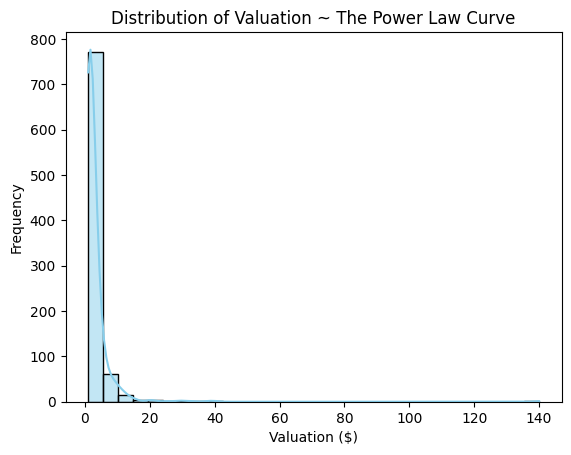

In [15]:
# Explore distribution of valuation
sns.histplot(df_startups['Valuation'], bins=30, kde=True, color='skyblue')
plt.xlabel('Valuation ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Valuation ~ The Power Law Curve')
plt.show()

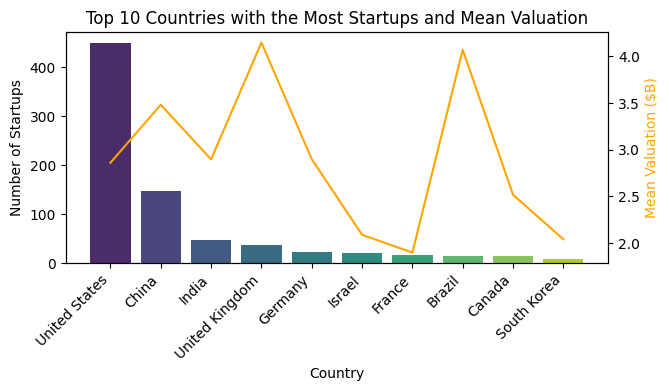

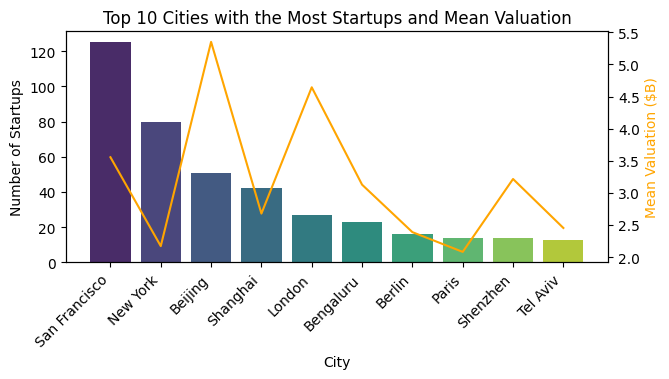

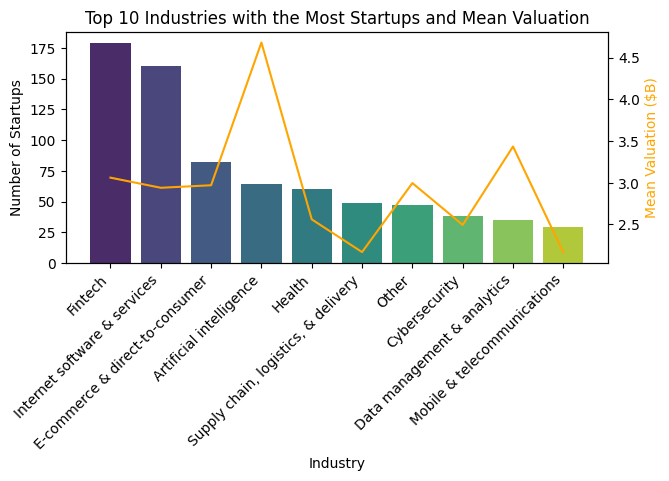

In [16]:
# ------------------------ TOP COUNTRIES ------------------------
top_countries = df_startups['Country'].value_counts().head(10)
top_cities = df_startups['City'].value_counts().head(10)
# Plot top countries with valuation on the other axis
plt.figure(figsize=(7, 3))
ax1 = sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Number of Startups')

# Create a second y-axis for valuation
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=top_countries.index, y=df_startups.groupby('Country')['Valuation'].mean()[top_countries.index], color='orange')
ax2.set_ylabel('Mean Valuation ($B)', color='orange')

plt.title('Top 10 Countries with the Most Startups and Mean Valuation')
plt.show()
# ------------------------------------------------------------------------


# ------------------------ TOP CITIES ------------------------
# Plot top cities with valuation on the other axis
plt.figure(figsize=(7, 3))
ax1 = sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Number of Startups')

# Create a second y-axis for valuation
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=top_cities.index, y=df_startups.groupby('City')['Valuation'].mean()[top_cities.index], color='orange')
ax2.set_ylabel('Mean Valuation ($B)', color='orange')

plt.title('Top 10 Cities with the Most Startups and Mean Valuation')
plt.show()
# ------------------------------------------------------------------------


# ------------------------ TOP INDUSTRIES ------------------------

top_industries = df_startups['Industry'].value_counts().head(10)
# Plot top countries with valuation on the other axis
plt.figure(figsize=(7, 3))
ax1 = sns.barplot(x=top_industries.index, y=top_industries.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('Number of Startups')

# Create a second y-axis for valuation
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=top_industries.index, y=df_startups.groupby('Industry')['Valuation'].mean()[top_industries.index], color='orange')
ax2.set_ylabel('Mean Valuation ($B)', color='orange')

plt.title('Top 10 Industries with the Most Startups and Mean Valuation')
plt.show()
# ------------------------------------------------------------------------

### **Causal relationship**


In this analysis, we have primarily focused on mitigating the influence of quantitative confounders to understand the relationship between the year a startup joined and its valuation. Quantitative confounders are variables that could potentially impact both the independent variable (Join Date) and the dependent variable (Valuation). By employing linear regression and incorporating additional quantitative variables such as encoded categorical features (City_encoded, Investor_encoded, Country_encoded, and Industry_encoded), we aim to control for these confounders.

This statistical approach allows us to account for the potential influence of various factors that could affect startup valuations beyond just the year of joining. By including these covariates in our regression model, we can tease out the specific effect of Join Date on Valuation while holding other factors constant. In doing so, we mitigate the confounding effects of these variables, providing a more accurate understanding of how the timing of a startup's inception relates to its subsequent valuation.

This rigorous methodology helps us discern whether the Join Date indeed holds significance as an independent factor affecting startup success, beyond the potential noise introduced by other quantitative variables. It allows us to draw more robust and reliable conclusions about the impact of the founding year on a startup's valuation

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for each categorical variable
label_encoder_city = LabelEncoder()
label_encoder_investor = LabelEncoder()
label_encoder_country = LabelEncoder()
label_encoder_industry = LabelEncoder()

# Apply label encoding to each categorical variable
df_startups['City_encoded'] = label_encoder_city.fit_transform(df_startups['City'])
df_startups['Investor_encoded'] = label_encoder_investor.fit_transform(df_startups['Investors'])
df_startups['Country_encoded'] = label_encoder_country.fit_transform(df_startups['Country'])
df_startups['Industry_encoded'] = label_encoder_industry.fit_transform(df_startups['Industry'])

import statsmodels.api as sm


# Define the independent variables (encoded categorical variables) and the dependent variable (Valuation)
independent_vars = ['Join Date','City_encoded', 'Investor_encoded', 'Country_encoded', 'Industry_encoded']
dependent_var = 'Valuation'

# Create a DataFrame for the independent variables
X = df_startups[independent_vars]

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Create a Series for the dependent variable
y = df_startups[dependent_var]

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Valuation   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     7.852
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           3.06e-07
Time:                        00:07:52   Log-Likelihood:                -2729.7
No. Observations:                 860   AIC:                             5471.
Df Residuals:                     854   BIC:                             5500.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1670.9207    288.530  

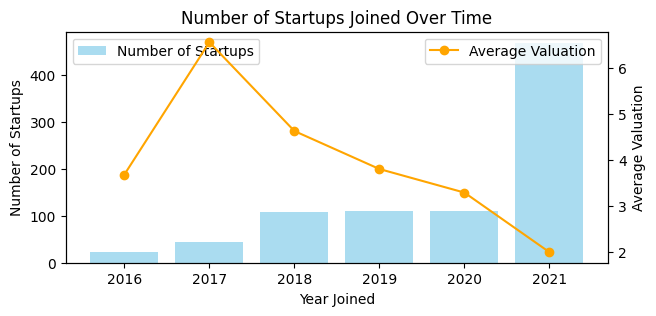

In [18]:
# Visualize join date


year_counts = df_startups['Join Date'].value_counts().sort_index()

# Group the data by 'Join Date' and calculate the mean valuation for each year
yearly_data = df_startups.groupby('Join Date')['Valuation'].mean()

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(7, 3))

# Plot the number of startups on the left y-axis
ax1.bar(year_counts.index, year_counts.values, color='skyblue', alpha=0.7, label='Number of Startups')
ax1.set_xlabel('Year Joined')
ax1.set_ylabel('Number of Startups')
ax1.set_title('Number of Startups Joined Over Time')

# Create a second y-axis on the right side for valuation
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data.values, color='orange', marker='o', label='Average Valuation')
ax2.set_ylabel('Average Valuation')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### **Results and conclusions**

The Ordinary Least Squares (OLS) regression results provide insights into the relationship between the founding date of startups and their valuations, while controlling for several confounding variables. The R-squared value of 0.044 suggests that the model accounts for 4.4% of the variance in valuations. This indicates that while the founding date and other variables in the model explain a portion of the variation in valuations, there are additional factors at play that influence a startup's valuation.

Specifically, **the coefficient for "Join Date" is -0.8258, and it is statistically significant (p < 0.001)**. This negative coefficient implies that, on average, startups founded in more recent years tend to have lower valuations. However, it's crucial to interpret t**his result in the context of the conclusion that the relationship between founding year and valuation is influenced by cyclical economic factors. **During the years 2016-2021, there appears to be a negative association, **but this may change in subsequent economic cycles.**

Additionally, the coefficients for "City_encoded," "Investor_encoded," "Country_encoded," and "Industry_encoded" do not show strong statistical significance (p > 0.05), suggesting that these variables may not have a substantial impact on valuations after accounting for the founding year.

Overall, while the analysis demonstrates **that the founding year does explain a portion of the variance in startup valuations,**the modest R-squared value and the potential influence of unmeasured qualitative confounders indicate that other factors, not included in this model, play a significant role in determining startup valuations.
